# Project 3

Sophie and Becca

In [82]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *
import scipy 
from numpy import sqrt, sin, cos, pi
import matplotlib.pyplot as plt
import numpy as np  


In [83]:
# import units needed in the model
s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter


<Unit('meter')>

In [84]:
params = Params( 
                g_a = - 9.8 * m / s **2,    # gravitational acceleration
                v_init = 10 * m / s,       # initial velocity
                y_init = 0.1 * m,            # initial position
                m_frog = 0.1 * kg,        # mass of the frog
                r_lilypad = 0.1 * m,      # radius of lilypad
                ρ = 997 * kg / m**3,      # density of water 
                t_0 = 0 * s,              # t at 0s
                t_end = 300 * s,
                )

,values
g_a,-9.8 meter / second ** 2
v_init,10.0 meter / second
y_init,0.1 meter
m_frog,0.1 kilogram
r_lilypad,0.1 meter
ρ,997.0 kilogram / meter ** 3
t_0,0 second
t_end,300 second


In [85]:
def make_system(params):
    
    unpack(params)
    
    area = np.pi * (r_lilypad)**2
    volume = area * 5e-3 * m               # volume of lilypad / displaced water
    init = State(y=y_init, v=v_init)
    t_0 = 0 * s
    t_end = 30 * s
    
    return System(params, volume = volume, init = init)

In [86]:
system = make_system(params)


,values
g_a,-9.8 meter / second ** 2
v_init,10.0 meter / second
y_init,0.1 meter
m_frog,0.1 kilogram
r_lilypad,0.1 meter
ρ,997.0 kilogram / meter ** 3
t_0,0 second
t_end,300 second
volume,0.00015707963267948968 meter ** 3
init,y 0.1 meter v 10.0 meter / sec...


In [87]:
def slope_func(state, t, system):

    y, v = state
    unpack(system)
    
    #sqrt(2 * g_a * y)- g_a * (t*s) 
    dydt = v                              #velocity at certain point
    dvdt = g_a                            #acceleration due to gravity 
    
    return dydt, dvdt

In [88]:
slope_func(system.init, 0, system)

(<Quantity(10.0, 'meter / second')>, <Quantity(-9.8, 'meter / second ** 2')>)

In [89]:
def event_func(state, t, system):
    """Return the height of the penny above the sidewalk.
    """
    y, v = state
    return y

In [90]:
results, details = run_ode_solver(system, slope_func, events=event_func, max_step=0.1*s)
details.message
results

,y,v
0.000000,1.000000e-01,10.000000
0.014212,2.411264e-01,9.860726
0.114212,1.178199e+00,8.880726
0.214212,2.017272e+00,7.900726
0.314212,2.758344e+00,6.920726
0.414212,3.401417e+00,5.940726
0.514212,3.946490e+00,4.960726
0.614212,4.393562e+00,3.980726
0.714212,4.742635e+00,3.000726
0.814212,4.993707e+00,2.020726


Saving figure to file figs/chap09-fig02.pdf


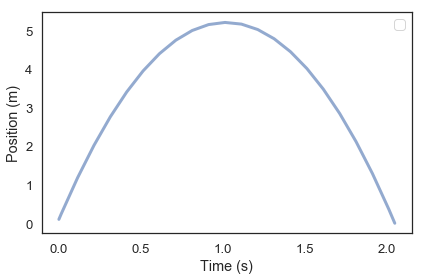

In [91]:
def plot_position(results):
    plot(results.y)
    decorate(xlabel='Time (s)',
             ylabel='Position (m)')
    
plot_position(results)
savefig('figs/chap09-fig02.pdf')

When the force applied by the frog jumping is equal to the buoyant force due to the water, then we know the lilypad has been submerged in water.

<img src="diagrams/force_graph.png" width=300 height=300>
Source: https://pdfs.semanticscholar.org/3c26/3adf9dec3a122deb6d43492ba7b09cc5ac7e.pdf
<img src="diagrams/force_graph_spline.png" width=300 height=300>

In [92]:
from scipy.integrate import quad

def integrand(x, a0, a1, b1, a2, b2, a3, b3, w):
    
    return a0 + a1 * cos( x * w ) + b1 * sin( x * w ) + a2 * cos( 2 * x * w ) + b2 * sin( 2 * x * w ) + a3 * cos( 3 * x * w ) + b3 * sin( 3 * x * w )

a0 = 0.2677 
a1 = -0.3003
b1 = 0.4249 
a2 = 0.1534
b2 = -0.1254
a3 = 0.02675 
b3 = -0.03189 
w = 0.04902 

I = quad(integrand, 0, 1, args=(a0, a1, b1, a2, b2, a3, b3, w))
I


(0.1492576936078532, 1.6570932804588568e-15)

In [93]:
# motion of lilypad




F_lily = - ρ * volume * g_a     # buoyant force
F_frog = 0.6 * N

if F_frog >= F_lily: 
    print("sink")

else: 
    print("float")


float


In [103]:
def sweep_height(height, params):  

    params = Params(params, height = height)
    system = make_system(params)
    Force = 
    return Force

In [105]:
heights = linspace(1, 10, 10)
sweep = SweepSeries()

for height in heights:
    Force = sweep_height(height, params)
    print(height, Force)
    sweep[height] = Force

1.0 3.6813818828533735 meter
2.0 3.6813818828533735 meter
3.0 3.6813818828533735 meter
4.0 3.6813818828533735 meter
5.0 3.6813818828533735 meter
6.0 3.6813818828533735 meter
7.0 3.6813818828533735 meter
8.0 3.6813818828533735 meter
9.0 3.6813818828533735 meter
10.0 3.6813818828533735 meter


In [109]:
# set up initial values

v = Vector(1, 1) * m / s       # velocity vector of the frog
p_frog = Vector(1, 1) * m      # position vector of the frog
p_lily = Vector(0, 0) * m      # position vector of the lilypad

# By setting uo initial velocity manually, a certain maximum height is determined
# We can sweep through a series of initial velocity



<Quantity([0. 0.], 'meter')>

In [110]:
# set up system values

# the frog is treated as point mass



def make_system1(params):

    unpack(params)
    

    
    # make the initial state
    init = State(x_frog = p_frog.x,
                 y_frog = p_frog.y,
                 vx = v.x,
                 vy = v.y)
    
    # compute area from radius
    area = np.pi * r_lilypad **2
    
    return System(params, init=init, area=area)

In [111]:
system1 = make_system1(params)

,values
g_a,-9.8 meter / second ** 2
v_init,10.0 meter / second
y_init,0.1 meter
m_frog,0.1 kilogram
r_lilypad,0.1 meter
ρ,997.0 kilogram / meter ** 3
t_0,0 second
t_end,300 second
init,x_frog 1.0 meter y_frog ...
area,0.031415926535897934 meter ** 2


In [112]:
def slope_func(state, t, system):

    x_frog, y_frog, vx, vy = state
    unpack(system)

    V = Vector(vx, vy)
    
    a_grav = Vector(0, g_a)

    return vx, vy, a_grav.x, a_grav.y

In [113]:
# we test it with the initial condition
slope_func(system1.init, 0, system)

(<Quantity(1.0, 'meter / second')>,
 <Quantity(1.0, 'meter / second')>,
 <Quantity(0.0, 'meter / second ** 2')>,
 <Quantity(-9.8, 'meter / second ** 2')>)

In [114]:
def event_func(state, t, system):

    x_frog, y_frog, vx, vy = state
    return y_frog

In [115]:
results1, details = run_ode_solver(system1, slope_func, events=event_func, max_step=0.01*s)

In [116]:
details

,values
sol,None
t_events,[[0.5651757435881722]]
nfev,344
njev,0
nlu,0
status,1
message,A termination event occurred.
success,True


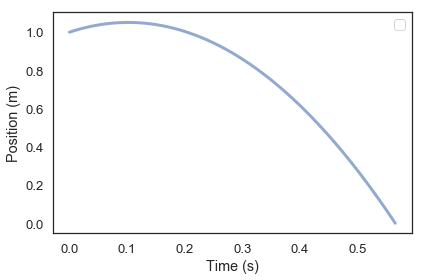

In [120]:
def plot_position(results):
    plot(results1.y_frog)
    decorate(xlabel='Time (s)',
             ylabel='Position (m)')
    
plot_position(results1)

In [127]:
def make_system2(params):

    unpack(params)
    
    # convert angle to degrees
    theta = np.deg2rad(angle)
    
    # compute x and y components of velocity
    velocity = 10 * m / s # remember to change it in terms of height
    vx, vy = pol2cart(theta, velocity)
    
    # make the initial state
    init = State(x_frog = p_frog.x,
                 y_frog = p_frog.y,
                 vx = v.x,
                 vy = v.y)

     # compute area from radius
    area = np.pi * r_lilypad **2
    
    return System(params, init=init, area=area)

In [128]:
def range_func(angle, params):  

    params = Params(params, angle=angle)
    system2 = make_system2(params)
    results, details = run_ode_solver(system2, slope_func, events=event_func)
    x_dist = get_last_value(results1.y_frog) * m
    return x_dist

In [129]:
angles = linspace(20, 80, 21)
sweep = SweepSeries()

for angle in angles:
    x_dist = range_func(angle, params)
    print(angle, x_dist)
    sweep[angle] = x_dist

20.0 -2.7755575615628914e-17 meter
23.0 -2.7755575615628914e-17 meter
26.0 -2.7755575615628914e-17 meter
29.0 -2.7755575615628914e-17 meter
32.0 -2.7755575615628914e-17 meter
35.0 -2.7755575615628914e-17 meter
38.0 -2.7755575615628914e-17 meter
41.0 -2.7755575615628914e-17 meter
44.0 -2.7755575615628914e-17 meter
47.0 -2.7755575615628914e-17 meter
50.0 -2.7755575615628914e-17 meter
53.0 -2.7755575615628914e-17 meter
56.0 -2.7755575615628914e-17 meter
59.0 -2.7755575615628914e-17 meter
62.0 -2.7755575615628914e-17 meter
65.0 -2.7755575615628914e-17 meter
68.0 -2.7755575615628914e-17 meter
71.0 -2.7755575615628914e-17 meter
74.0 -2.7755575615628914e-17 meter
77.0 -2.7755575615628914e-17 meter
80.0 -2.7755575615628914e-17 meter
